### PANDAS


In [1]:
import pandas as pd
import numpy as np

data = {
    "ID" : [101, 102, 103, 104, 105],
    "Name" : ["Fouk", "Khounmy", None,  "Kai", "Nhan"],
    "Age" : [26, 18, 20, None, 19],
    "Salary" : [50000, 35000, 65000, 1000000, None]
}

df = pd.DataFrame(data)
print(df)

#Điện giấ trị triệu trong cột Age = giá trị trung bình
df['Age'].fillna(df['Age'].mean(),inplace=True)

#Loại bỏ các dòng chứa dữ liệu thiếu
df.dropna(inplace=True)


#Điền giá trị thiếu trong Name = "Unknown" ArithemticError
df['Name'].fillna("Unknown", inplace=True)

#Điền giá trị thiếu trong Salary = Phương pháp Interpolation 
df['Salary'].interpolate(method='linear', inplace=True)

    ID     Name   Age     Salary
0  101     Fouk  26.0    50000.0
1  102  Khounmy  18.0    35000.0
2  103     None  20.0    65000.0
3  104      Kai   NaN  1000000.0
4  105     Nhan  19.0        NaN


C:\Users\Kai\AppData\Local\Temp\ipykernel_17132\2120395246.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\Kai\AppData\Local\Temp\ipykernel_17132\2120395246.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [2]:
#Cho data
df1 = pd.DataFrame({
    "Id" : [1, 2, 3],
    "Score_A" : [70, 90, 85]
})

df2 = pd.DataFrame({
    "Id" : [3, 4, 5],
    "Score_A" : [62, 91, 75]
})

#Thực hiện Merge trên cot id (Inner join, left join, outer join)
# Inner Join
inner_join = pd.merge(df1, df2, on='Id', how='inner')

# Left Join
left_join = pd.merge(df1, df2, on='Id', how='left')

# Outer Join
outer_join = pd.merge(df1, df2, on='Id', how='outer')

# Display results
print("Inner Join:")
print(inner_join)
print("\nLeft Join:")
print(left_join)
print("\nOuter Join:")
print(outer_join)


#Nối DataFrame theo chiều dọc
# Concatenate vertically (axis=0)
vertical_concat = pd.concat([df1, df2], axis=0)
print(vertical_concat)


#Gộp df1 và df2 để diền giá trị thiếu 
f=df1.set_index('Id').combine_first(df2.set_index('Id')).reset_index()
print(f)


Inner Join:
   Id  Score_A_x  Score_A_y
0   3         85         62

Left Join:
   Id  Score_A_x  Score_A_y
0   1         70        NaN
1   2         90        NaN
2   3         85       62.0

Outer Join:
   Id  Score_A_x  Score_A_y
0   1       70.0        NaN
1   2       90.0        NaN
2   3       85.0       62.0
3   4        NaN       91.0
4   5        NaN       75.0
   Id  Score_A
0   1       70
1   2       90
2   3       85
0   3       62
1   4       91
2   5       75
   Id  Score_A
0   1       70
1   2       90
2   3       85
3   4       91
4   5       75


In [4]:
import pandas as pd
import numpy as np

# Tạo dữ liệu với 100000 dòng thay vì 1000000
data = pd.DataFrame({
    "ID": range(1, 100001),  # Từ 1 đến 100000
    "Value": np.random.randint(0, 100, 100000)  # Tạo 100000 giá trị ngẫu nhiên
})

# Tối ưu hóa bộ nhớ bằng astype
data["ID"] = data["ID"].astype("int32")
data["Value"] = data["Value"].astype("int8")

# Tìm 5 giá trị phổ biến nhất trong cột Value
# Sử dụng value_counts() thay vì nlargest để tìm giá trị phổ biến nhất
top_5_values = data["Value"].value_counts().head(5)
print("5 giá trị phổ biến nhất trong cột Value:")
print(top_5_values)

# Sử dụng query để lọc dữ liệu
filtered_data = data.query("Value > 90")
print("\nDữ liệu sau khi lọc với Value > 90:")
print(filtered_data.head())

5 giá trị phổ biến nhất trong cột Value:
Value
9     1088
57    1074
88    1065
70    1064
21    1060
Name: count, dtype: int64

Dữ liệu sau khi lọc với Value > 90:
      ID  Value
5      6     99
28    29     92
37    38     95
73    74     98
148  149     96


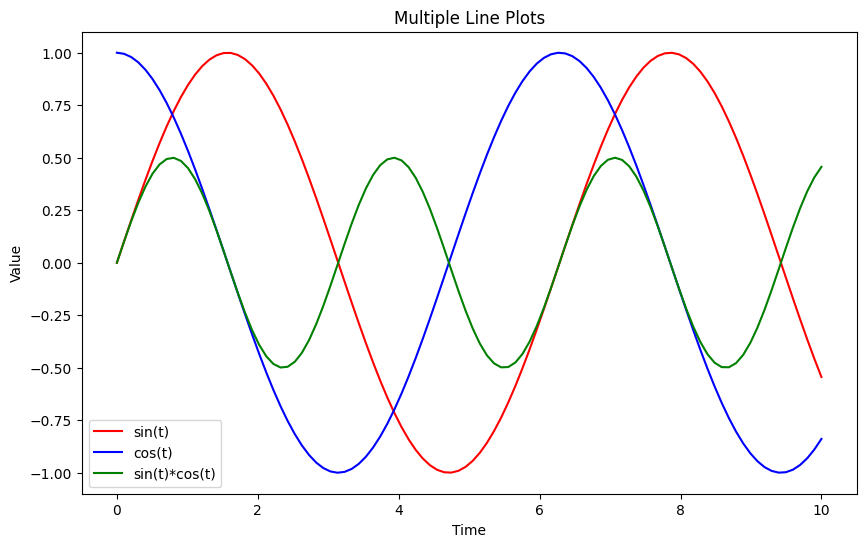

In [5]:
# Biểu đồ nhiều đường

# Cho dữ liệu sau

import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 10, 100)
y1 = np.sin(t)
y2 = np.cos(t)
y3 = np.sin(t) * np.cos(t)

#Tạo biều đồ các đường theo thời gian
plt.figure(figsize=(10, 6))
plt.plot(t, y1, label='sin(t)', color='red')
plt.plot(t, y2, label='cos(t)', color='blue')
plt.plot(t, y3, label='sin(t)*cos(t)', color='green')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multiple Line Plots')
plt.legend()
plt.show()

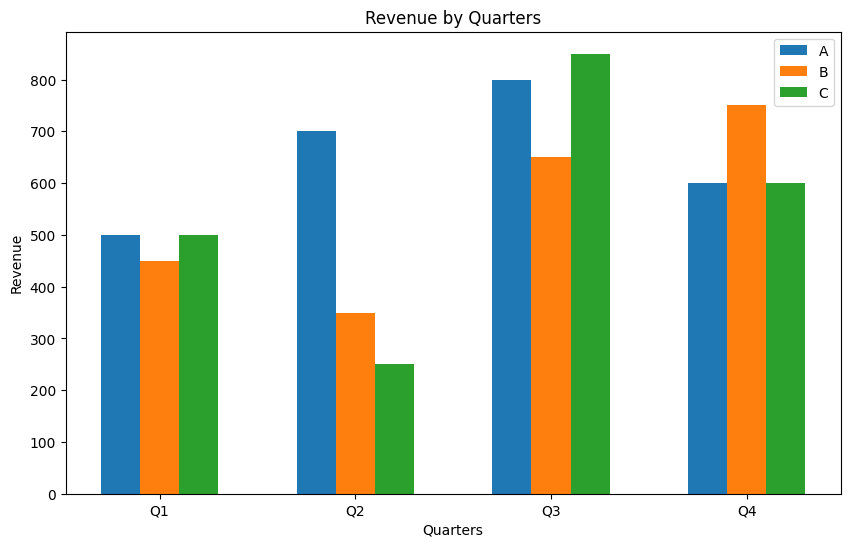

In [6]:
#Biêu đồ thanh nhóm

#Cho dữ liệu sau
labels = ["Q1", "Q2", "Q3", "Q4"]
A = [500, 700, 800, 600]
B = [450, 350, 650, 750]
C = [500, 250, 850, 600]

#Vẽ biểu đồ thành nhóm thể hiện doanh thu của A, B, C trong 4 quý
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, A, width, label='A')
bar2 = ax.bar(x, B, width, label='B')

bar3 = ax.bar(x + width, C, width, label='C')

ax.set_xlabel('Quarters')
ax.set_ylabel('Revenue')
ax.set_title('Revenue by Quarters')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

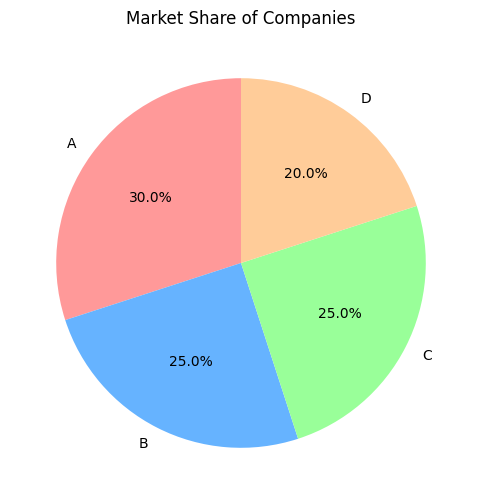

In [7]:
#Biểu đò tròn
Cty = ["A", "B", "C", "D"]
thiphan = [30, 25, 25, 20]
color = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]

#Tạo biểu đồ tròn thể hiện thị phần của 4 công ty
plt.figure(figsize=(10, 6))

plt.pie(thiphan, labels=Cty, colors=color, autopct='%1.1f%%', startangle=90)
plt.title('Market Share of Companies')
plt.show()

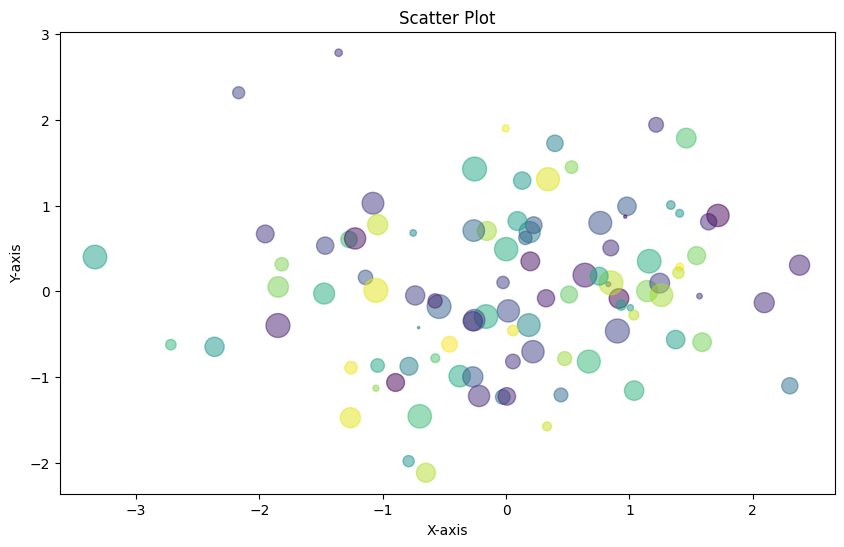

In [8]:
#Biểu đồ phân tán
x = np.random.randn(100)
y = np.random.randn(100)
sizes = np.random.rand(100)*300
colors = np.random.rand(100)

#Tạo biểu đồ phân tán của hai biễn ngẫu nhiên 
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=sizes, c=colors, alpha=0.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')
plt.show()

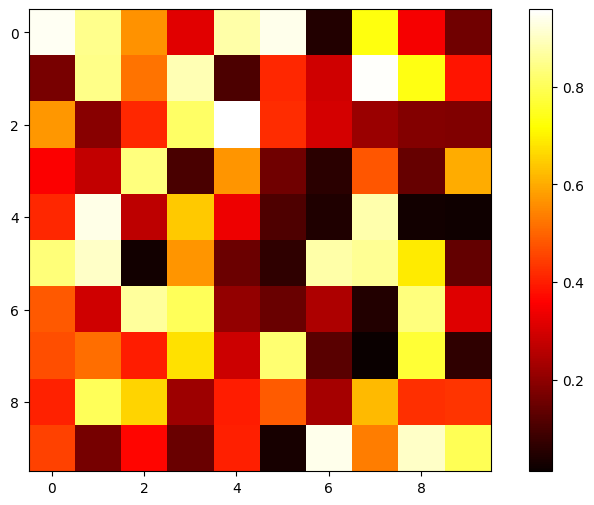

In [9]:
# Biểu đồ nhiệt 
data = np.random.rand(10, 10)
#Vẽ một heatmap thể hiện sự phân bổ của dữ liệu trên ma trận
plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()